CSR_matrix to array done
initialize data done
pre process
i: 0    loss:0.00343925257909   accuracy:0.775
i: 1    loss:0.00345759995603   accuracy:0.665
i: 2    loss:0.00343974807895   accuracy:0.76
i: 3    loss:0.00343051229804   accuracy:0.695
i: 4    loss:0.0033924022858   accuracy:0.77
i: 5    loss:0.00336131039203   accuracy:0.805


c:\program files\python35\lib\site-packages\ipykernel_launcher.py:148: RuntimeWarning: invalid value encountered in double_scalars


i: 6    loss:0.00336721715058   accuracy:0.72
i: 7    loss:0.00332154169945   accuracy:0.795
i: 8    loss:0.00335323388696   accuracy:0.76
i: 9    loss:0.0033169659634   accuracy:0.785
i: 10    loss:0.00331534233461   accuracy:0.765
i: 11    loss:0.0033286739575   accuracy:0.785
i: 12    loss:0.0033323283821   accuracy:0.795
i: 13    loss:0.00332676266031   accuracy:0.755
i: 14    loss:0.00328128108095   accuracy:0.83
i: 15    loss:0.00327675921251   accuracy:0.79
i: 16    loss:0.00325738659814   accuracy:0.79
i: 17    loss:0.00323622548678   accuracy:0.805
i: 18    loss:0.00329768403038   accuracy:0.745
i: 19    loss:0.00326985486462   accuracy:0.77
i: 20    loss:0.00329277590857   accuracy:0.76
i: 21    loss:0.00325892891172   accuracy:0.77
i: 22    loss:0.00330648011088   accuracy:0.735
i: 23    loss:0.00328373320642   accuracy:0.74
i: 24    loss:0.00322368744802   accuracy:0.805
i: 25    loss:0.00326239549747   accuracy:0.74
i: 26    loss:0.00320681947973   accuracy:0.77
i: 27    l

i: 178    loss:0.00267242672724   accuracy:0.755
i: 179    loss:0.00263012032876   accuracy:0.76
i: 180    loss:0.00275053690259   accuracy:0.74
i: 181    loss:0.00292239102398   accuracy:0.69
i: 182    loss:0.00273070067937   accuracy:0.76
i: 183    loss:0.00271831696817   accuracy:0.745
i: 184    loss:0.00245206597385   accuracy:0.815
i: 185    loss:0.00287488636236   accuracy:0.7
i: 186    loss:0.0025896771934   accuracy:0.78
i: 187    loss:0.00263025897807   accuracy:0.765
i: 188    loss:0.00265968002753   accuracy:0.755
i: 189    loss:0.00277331809511   accuracy:0.73
i: 190    loss:0.00282605268926   accuracy:0.715
i: 191    loss:0.00263614751851   accuracy:0.765
i: 192    loss:0.00274506207608   accuracy:0.735
i: 193    loss:0.00271193274427   accuracy:0.745
i: 194    loss:0.00259920316938   accuracy:0.775
i: 195    loss:0.00270651183777   accuracy:0.75
i: 196    loss:0.00264472290866   accuracy:0.76
i: 197    loss:0.00283583130301   accuracy:0.72
i: 198    loss:0.0025587429711  

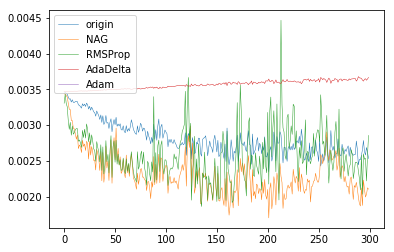

In [3]:
import numpy as np
from sklearn.externals.joblib import Memory
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import random
from matplotlib import pyplot as plt

mem = Memory("./lab1cache")

@mem.cache
def get_data():
    data = load_svmlight_file("a9a")
    return data[0], data[1]


def hw(x, w):
    return 1/(1 + np.exp(-1 * (w.T * x.T)[0, 0]) )


def loss_function(x, y, w):
    result = 0
    for i in range(len(x)):
        _ = x[i]
        hw_ = hw(x[i], w)
        result += (-1 / len(x)) * (y[i, 0] * np.log(hw_) + (1 - y[i, 0])*np.log(1 - hw_))
    return result/len(x)


def gradient(x, y, w):
    return ((hw(x, w) - y) * x).T


def random_select(x, y, size=1):
    x_result = list()
    y_result = list()
    for i in range(size):
        _ = random.random()
        index = int(_ * len(x))
        x_result.append(x[index].tolist()[0])
        y_result.append(y[index].tolist()[0])
    x_result = np.mat(x_result)
    y_result = np.mat(y_result)
    return x_result, y_result


def accuracy(x, y, w):
    hit = 0
    for i in range(len(x)):
        hw_ = hw(x[i], w)
        predict = 0
        if hw_ >=0.5:
            predict = 1
        else:
            predict = 0
        if predict == y[i, 0]:
            hit += 1
    result = hit/len(x)
    return result


if __name__ == '__main__':

    # 1.import data
    X, Y = get_data()

    # make -1 in Y to 0
    for i in np.nditer(Y, op_flags=['readwrite']):
        if i == -1:
            i[...] = 0

    # split data
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33)

    # CSR_matrix to array
    x_train = x_train.toarray()
    x_test = x_test.toarray()
    print("CSR_matrix to array done")

    # 2.initialize data
    w = [[0]] * len(x_train[0])
    w = np.mat(w, dtype=np.float64)
    learning_rate = 0.005
    rounds = 300
    Gamma = 0.9
    accuracy_list = [None] * rounds
    loss_validation = [None] * rounds
    vt_NAG = np.mat([[0]] * len(x_train[0]))
    Gt_RMSProp = 0
    Gt_AdaDelta = 0
    Gt_Adam = 0
    t_AdaDelta = 0
    mt_Adam = np.mat([[0]] * len(x_train[0]), dtype=np.float64)
    w_NAG = np.mat([[0]] * len(x_train[0]), dtype=np.float64)
    w_RMSProp = np.mat([[0]] * len(x_train[0]), dtype=np.float64)
    w_AdaDelta = np.mat([[0]] * len(x_train[0]), dtype=np.float64)
    wt_AdaDelta = 0
    w_Adam = np.mat([[0]] * len(x_train[0]), dtype=np.float64)
    gt_NAG = np.mat([[0]] * len(x_train[0]), dtype=np.float64)
    gt_RMSProp = np.mat([[0]] * len(x_train[0]), dtype=np.float64)
    gt_AdaDelta = np.mat([[0]] * len(x_train[0]), dtype=np.float64)
    gt_Adam = np.mat([[0]] * len(x_train[0]), dtype=np.float64)

    loss_list = [None] * rounds
    loss_NAG = [None] * rounds
    loss_RMSProp = [None] * rounds
    loss_AdaDelta = [None] * rounds
    loss_Adam = [None] * rounds
    print("initialize data done")

    # pre process
    x_train = np.mat(x_train)
    y_train = np.mat(y_train)
    y_train = y_train.T

    x_test = np.mat(x_test)
    y_test = np.mat(y_test)
    y_test = y_test.T
    print("pre process")

    # gradient descent
    for i in range(rounds):

        # 4.Gradient
        x_batch, y_batch = random_select(x_train, y_train)
        g = gradient(x_batch, y_batch, w) * learning_rate
        w = w - g
        # NAG
        gt_NAG = gradient(x_batch, y_batch, w_NAG - Gamma * vt_NAG)
        vt_NAG = Gamma * vt_NAG + learning_rate * gt_NAG
        w_NAG = w_NAG - vt_NAG

        # RMSProp
        gt_RMSProp = gradient(x_batch, y_batch, w_RMSProp)
        Gt_RMSProp = Gamma * Gt_RMSProp + (1 - Gamma)*((gt_RMSProp*gt_RMSProp.T)[0,0])
        w_RMSProp = w_RMSProp - (learning_rate / np.sqrt(Gt_RMSProp + 0.000000001))*gt_RMSProp

        # AdaDelta
        gt_AdaDelta = gradient(x_batch, y_batch, w_AdaDelta)
        Gt_AdaDelta = Gamma * Gt_AdaDelta + (1 - Gamma)*((gt_AdaDelta*gt_AdaDelta.T)[0,0])
        wt_AdaDelta = - (np.sqrt(t_AdaDelta+0.000000001)/np.sqrt(Gt_AdaDelta+0.000000001))*gt_AdaDelta
        w_AdaDelta = w_AdaDelta - wt_AdaDelta
        t_AdaDelta = Gamma * t_AdaDelta + (1-Gamma)*((wt_AdaDelta*wt_AdaDelta.T)[0, 0])

        # Adam
        gt_Adam = gradient(x_batch, y_batch, w_Adam)
        mt_Adam = mt_Adam * 0.9 + (1 - 0.9)*gt_Adam
        Gt_Adam = Gamma * Gt_Adam + (1 - Gamma)*((gt_Adam*gt_Adam.T)[0, 0])
        a = 0.001 * np.sqrt(1 - np.power(0.999, i)) / (1 - np.power(0.9, i))
        w_Adam = w_Adam - a * mt_Adam / np.square(Gt_Adam+0.000000001)



        # 5.TODO

        # 6.loss
        x_test_batch, y_test_batch = random_select(x_test, y_test, size=200)
        loss = loss_function(x_test_batch, y_test_batch, w)
        loss_NAG[i] = loss_function(x_test_batch, y_test_batch, w_NAG)
        loss_RMSProp[i] = loss_function(x_test_batch, y_test_batch, w_RMSProp)
        loss_AdaDelta[i] = loss_function(x_test_batch, y_test_batch, w_AdaDelta)
        loss_Adam[i] = loss_function(x_test_batch, y_test_batch, w_Adam)
        acc = accuracy(x_test_batch, y_test_batch, w)
        loss_validation[i] = loss
        accuracy_list[i] = acc

        # debug
        print('i: ' + str(i) + "    loss:" + str(loss) + "   accuracy:" + str(acc))

    # 7.draw

    plt.plot(range(rounds), loss_validation, LineWidth=0.5, label="origin")
    plt.plot(range(rounds), loss_NAG, LineWidth=0.5, label="NAG")
    plt.plot(range(rounds), loss_RMSProp, LineWidth=0.5, label="RMSProp")
    plt.plot(range(rounds), loss_AdaDelta, LineWidth=0.5, label="AdaDelta")
    plt.plot(range(rounds), loss_Adam, LineWidth=0.5, label="Adam")
    plt.legend(loc=2)

    # plt.plot(range(rounds), accuracy_list)
    plt.show()


